# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the dataset

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Data /MarketSegmentation-main/Customer Data.csv")
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [5]:
df1 = df.copy()

# EDA

In [6]:
df.shape

(8950, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [9]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# filling mean value in place of missing values in the dataset
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [11]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
# checking for duplicate rows in the dataset
df.duplicated().sum()

0

In [13]:
# drop CUST_ID column because it is not used
df.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [14]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

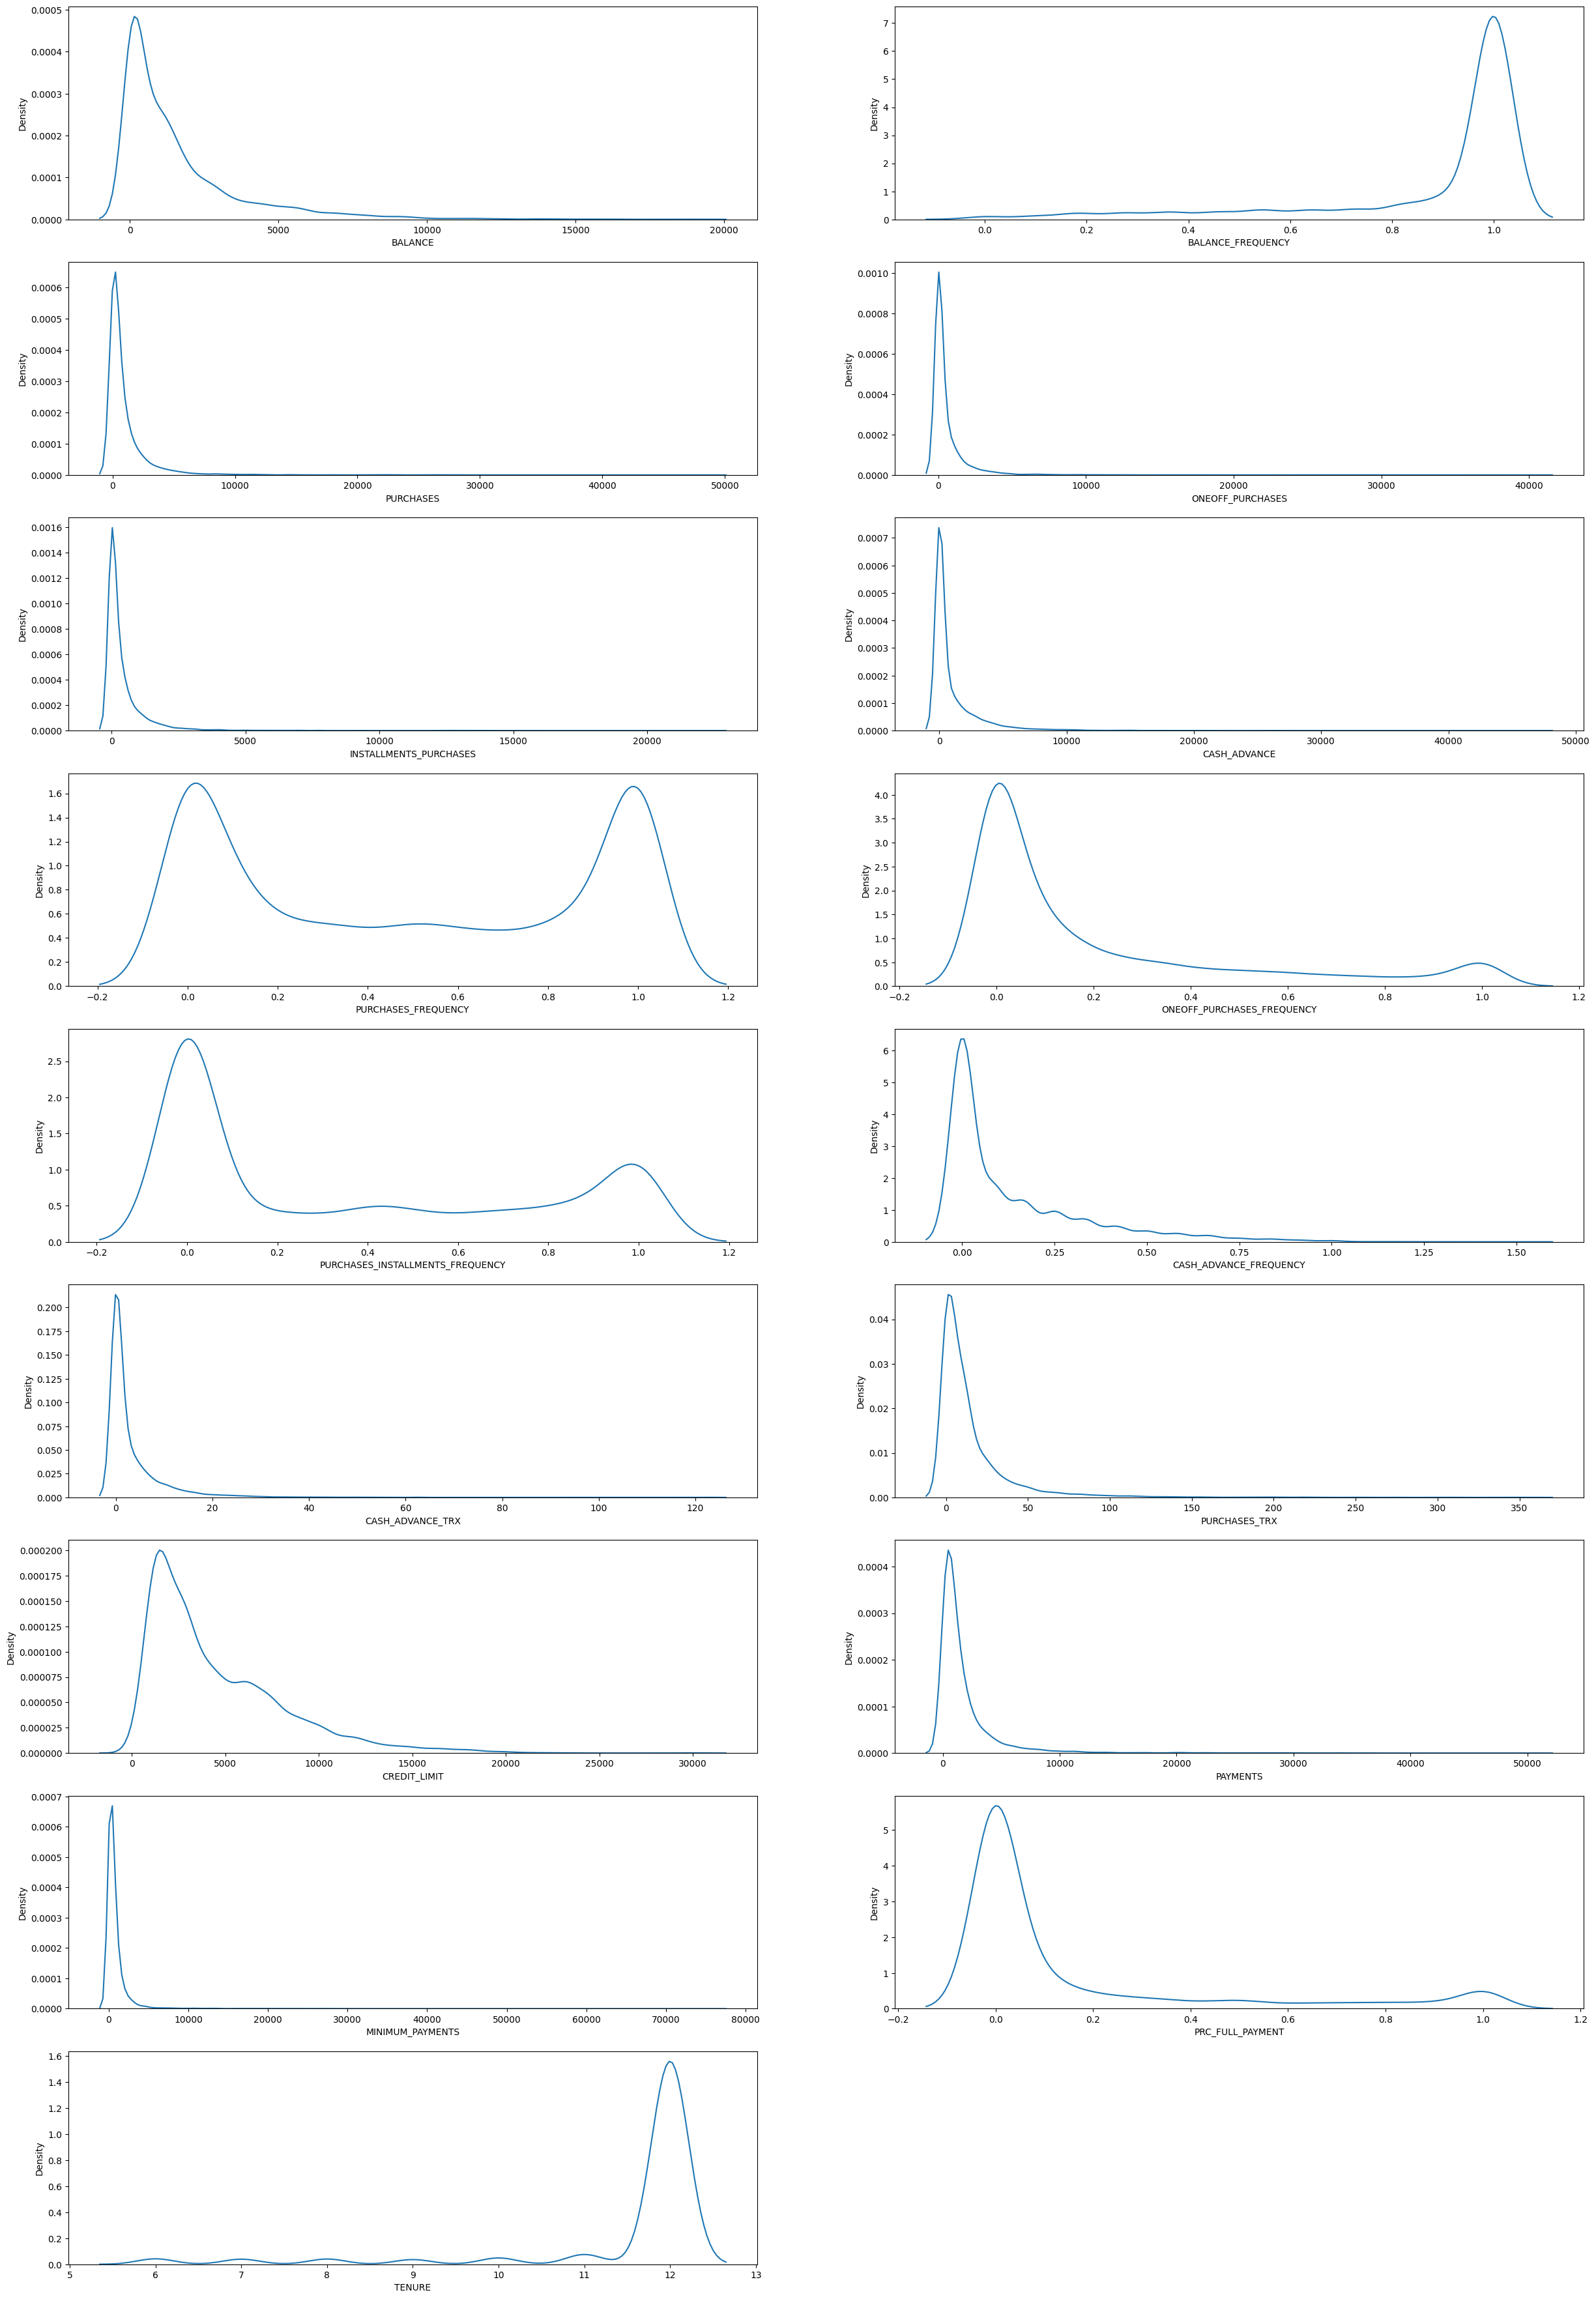

In [15]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)

plt.show()

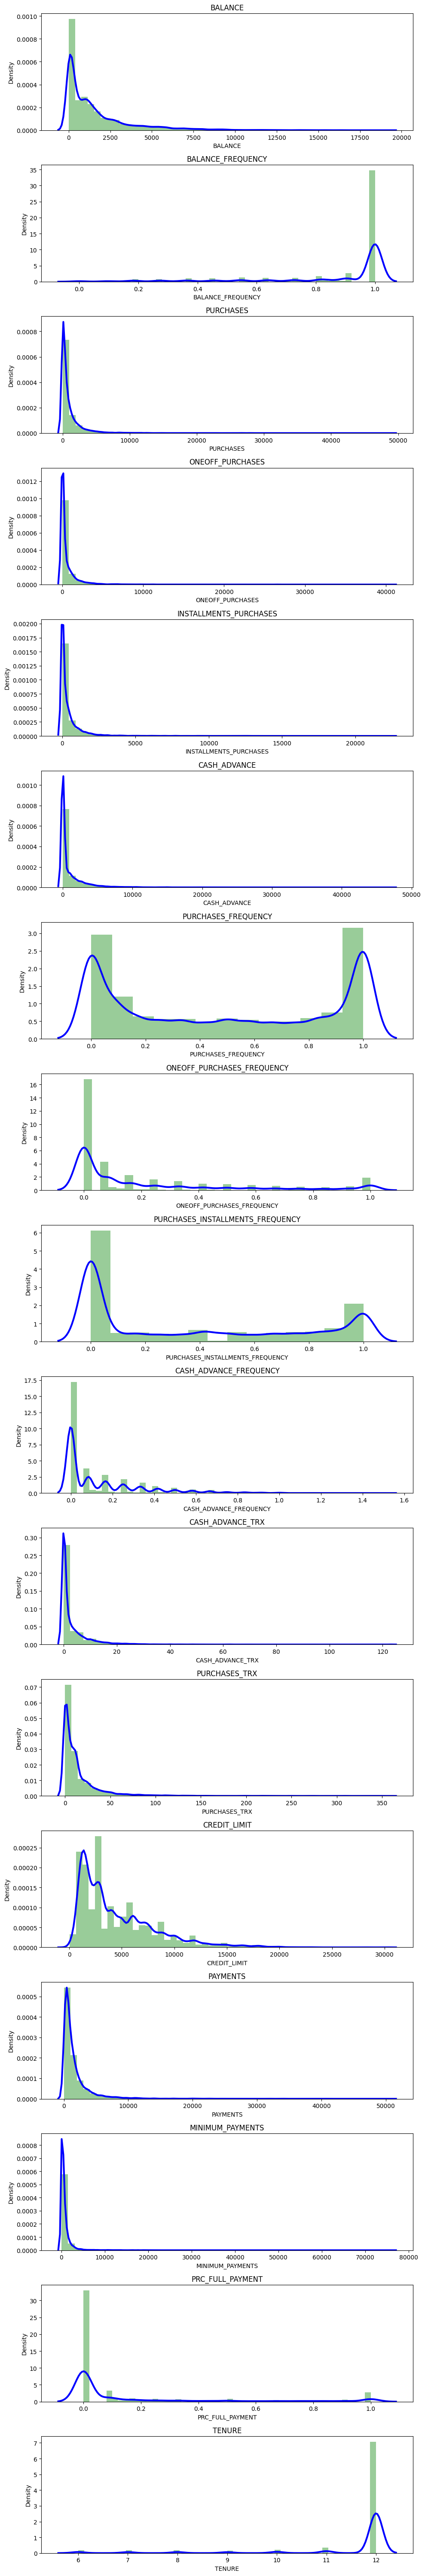

In [16]:
plt.figure(figsize=(10,60))
for i in range(0,17):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'b','bw': 0.1,'lw':3,'label':'KDE'},hist_kws={'color':'g'})
    plt.title(df.columns[i])
plt.tight_layout()

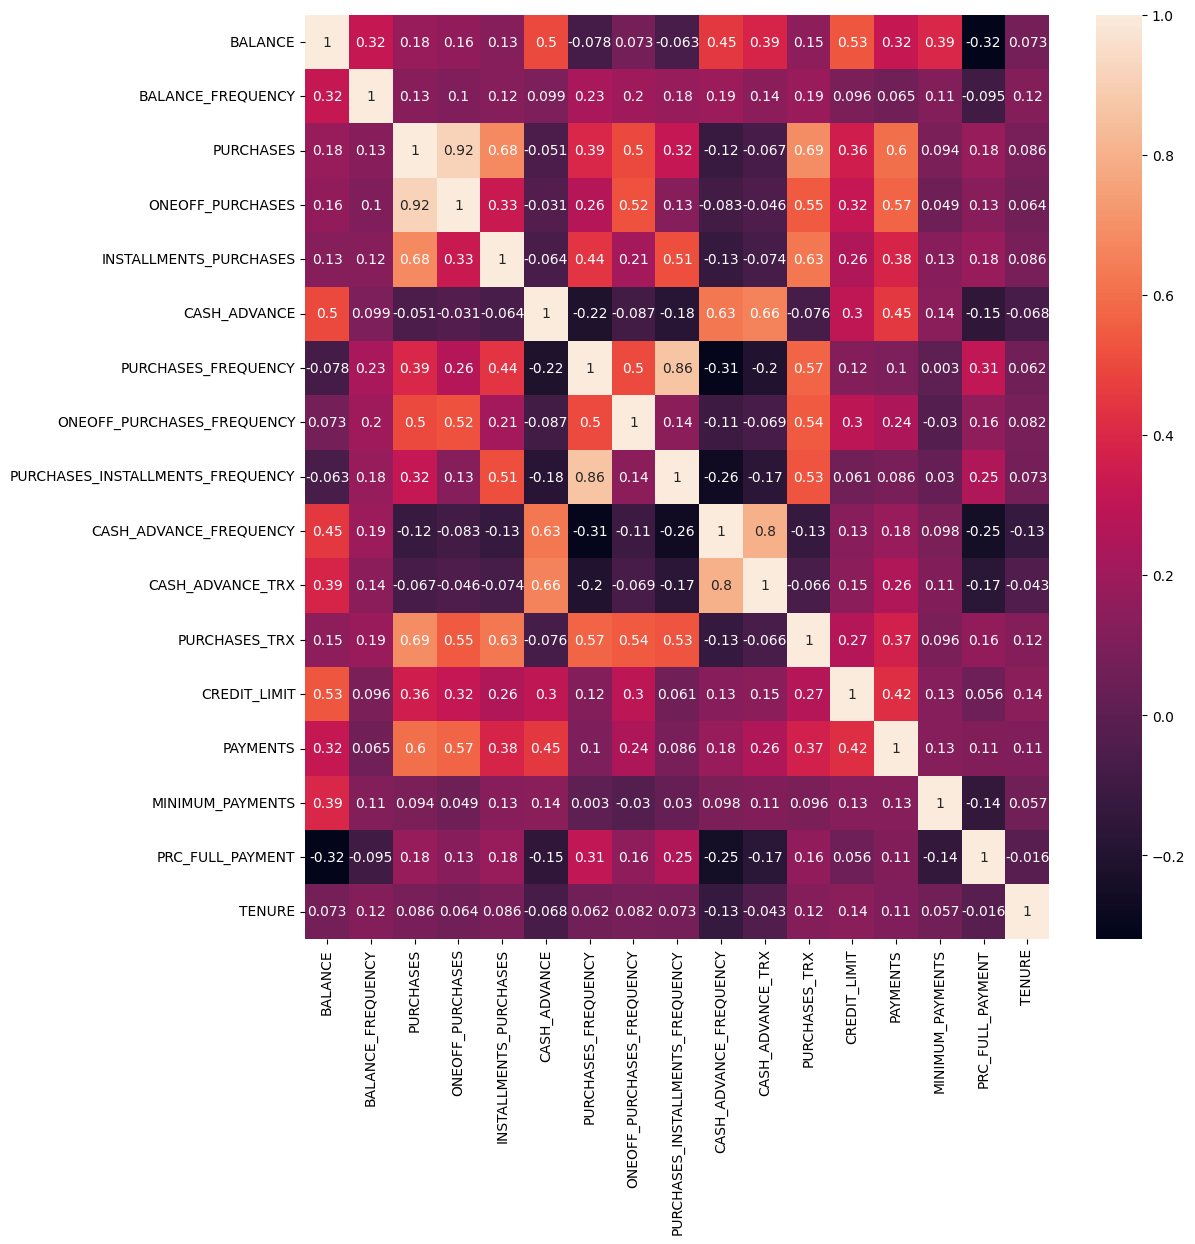

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Removing multicollinearity

In [18]:
# with the following function we can select highly correlated features
# it will remove first feature that is highly correlated with any other feature

def correlation(dataset, threshold):
  col_corr = set() # Set of all the names of correlated columns
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold: # we are interested in absolute coefficient value
        print(abs(corr_matrix.iloc[i,j]))
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr


In [19]:
corr_features = correlation(df, 0.7)
print(corr_features)

0.9168445587151489
0.8629336372699634
0.7995607573993837
{'PURCHASES_INSTALLMENTS_FREQUENCY', 'ONEOFF_PURCHASES', 'CASH_ADVANCE_TRX'}


In [20]:
df.drop(columns = corr_features, inplace = True)

In [21]:
df.shape

(8950, 14)

# Removing Outliners


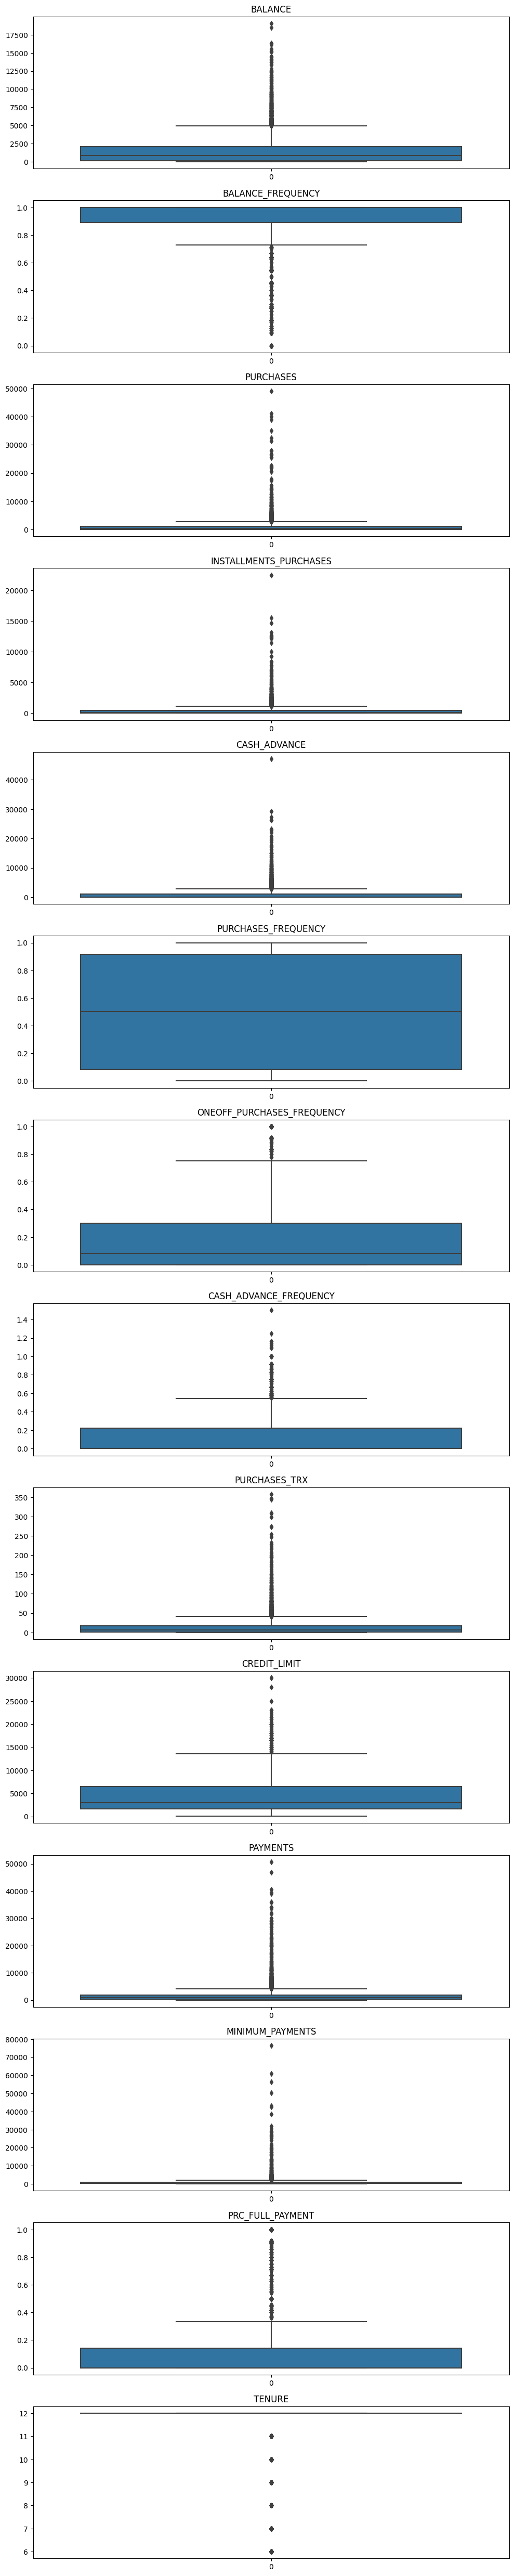

In [22]:
plt.figure(figsize=(10,60))
for i, col in enumerate(df.columns):
    plt.subplot(17,1,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()

In [23]:
# A DataFrame representing Min, Max, Median, 25th percentile, 75th percentile, IQR, Lower fence, and Upper fence for each column
df_details = df.describe().T
df_details['IQR'] = df_details['75%'] - df_details['25%']
df_details['Lower Fence'] = df_details['25%'] - 1.5 * df_details['IQR']
df_details['Upper Fence'] = df_details['75%'] + 1.5 * df_details['IQR']

In [24]:
df_details

count         mean          std        min  \
BALANCE                     8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY           8950.0     0.877271     0.236904   0.000000   
PURCHASES                   8950.0  1003.204834  2136.634782   0.000000   
INSTALLMENTS_PURCHASES      8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY         8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY  8950.0     0.202458     0.298336   0.000000   
CASH_ADVANCE_FREQUENCY      8950.0     0.135144     0.200121   0.000000   
PURCHASES_TRX               8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                8950.0  4494.449450  3638.612411  50.000000   
PAYMENTS                    8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS            8950.0   864.206542  2330.588021   0.019163   
PRC_FULL_PAYMENT            8950.0     0.153715     0.292499   0.000000   
TENURE                      8950.0    11.517318     1.338331   6.000000   

                                    25%          50%          75%  \
BALANCE                      128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY              0.888889     1.000000     1.000000   
PURCHASES                     39.635000   361.280000  1110.130000   
INSTALLMENTS_PURCHASES         0.000000    89.000000   468.637500   
CASH_ADVANCE                   0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY            0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY     0.000000     0.083333     0.300000   
CASH_ADVANCE_FREQUENCY         0.000000     0.000000     0.222222   
PURCHASES_TRX                  1.000000     7.000000    17.000000   
CREDIT_LIMIT                1600.000000  3000.000000  6500.000000   
PAYMENTS                     383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS             170.857654   335.628312   864.206542   
PRC_FULL_PAYMENT               0.000000     0.000000     0.142857   
TENURE                        12.000000    12.000000    12.000000   

                                    max          IQR  Lower Fence  \
BALANCE                     19043.13856  1925.858120 -2760.505265   
BALANCE_FREQUENCY               1.00000     0.111111     0.722223   
PURCHASES                   49039.57000  1070.495000 -1566.107500   
INSTALLMENTS_PURCHASES      22500.00000   468.637500  -702.956250   
CASH_ADVANCE                47137.21176  1113.821139 -1670.731709   
PURCHASES_FREQUENCY             1.00000     0.833334    -1.166668   
ONEOFF_PURCHASES_FREQUENCY      1.00000     0.300000    -0.450000   
CASH_ADVANCE_FREQUENCY          1.50000     0.222222    -0.333333   
PURCHASES_TRX                 358.00000    16.000000   -23.000000   
CREDIT_LIMIT                30000.00000  4900.000000 -5750.000000   
PAYMENTS                    50721.48336  1517.858151 -1893.511060   
MINIMUM_PAYMENTS            76406.20752   693.348888  -869.165678   
PRC_FULL_PAYMENT                1.00000     0.142857    -0.214286   
TENURE                         12.00000     0.000000    12.000000   

                             Upper Fence  
BALANCE                      4942.927215  
BALANCE_FREQUENCY               1.166666  
PURCHASES                    2715.872500  
INSTALLMENTS_PURCHASES       1171.593750  
CASH_ADVANCE                 2784.552848  
PURCHASES_FREQUENCY             2.166668  
ONEOFF_PURCHASES_FREQUENCY      0.750000  
CASH_ADVANCE_FREQUENCY          0.555555  
PURCHASES_TRX                  41.000000  
CREDIT_LIMIT                13850.000000  
PAYMENTS                     4177.921543  
MINIMUM_PAYMENTS             1904.229874  
PRC_FULL_PAYMENT                0.357143  
TENURE                         12.000000

In [25]:
lst_row_number = set()
outliner_col = dict()
for col in df.columns:
    outliner_col[col] = 0


for i in range(len(df)):
    for col in df.columns:
        if (df.loc[i, col] < df_details.loc[col, 'Lower Fence']) or (df.loc[i, col] > df_details.loc[col, 'Upper Fence']):
            lst_row_number.add(i)
            outliner_col[col]+=1
            break
print(len(lst_row_number))
for i in outliner_col:
    print(i, outliner_col[i])


5743
BALANCE 695
BALANCE_FREQUENCY 1489
PURCHASES 647
INSTALLMENTS_PURCHASES 348
CASH_ADVANCE 526
PURCHASES_FREQUENCY 0
ONEOFF_PURCHASES_FREQUENCY 377
CASH_ADVANCE_FREQUENCY 171
PURCHASES_TRX 92
CREDIT_LIMIT 22
PAYMENTS 75
MINIMUM_PAYMENTS 211
PRC_FULL_PAYMENT 558
TENURE 532


In [26]:
df_temp = df.copy()
for col in df.columns:
    df_temp[col] = df_temp[col].apply(lambda x: np.log(x) if x > 0 else 0)

In [27]:
df_temp.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  INSTALLMENTS_PURCHASES  \
0  3.711148          -0.200670   4.558079                4.558079   
1  8.071677          -0.095310   0.000000                0.000000   
2  7.822104           0.000000   6.650499                0.000000   
3  7.418583          -0.451985   7.312553                0.000000   
4  6.706513           0.000000   2.772589                0.000000   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0      0.000000            -1.791757                    0.000000   
1      8.770741             0.000000                    0.000000   
2      0.000000             0.000000                    0.000000   
3      5.326847            -2.484911                   -2.484911   
4      0.000000            -2.484911                   -2.484911   

   CASH_ADVANCE_FREQUENCY  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
0                0.000000       0.693147      6.907755  5.307287   
1               -1.386294       0.000000      8.853665  8.319482   
2                0.000000       2.484907      8.922658  6.433047   
3               -2.484911       0.000000      8.922658  0.000000   
4                0.000000       0.000000      7.090077  6.519641   

   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0          4.938135          0.000000  2.484907  
1          6.977599         -1.504078  2.484907  
2          6.441401          0.000000  2.484907  
3          6.761812          0.000000  2.484907  
4          5.500406          0.000000  2.484907

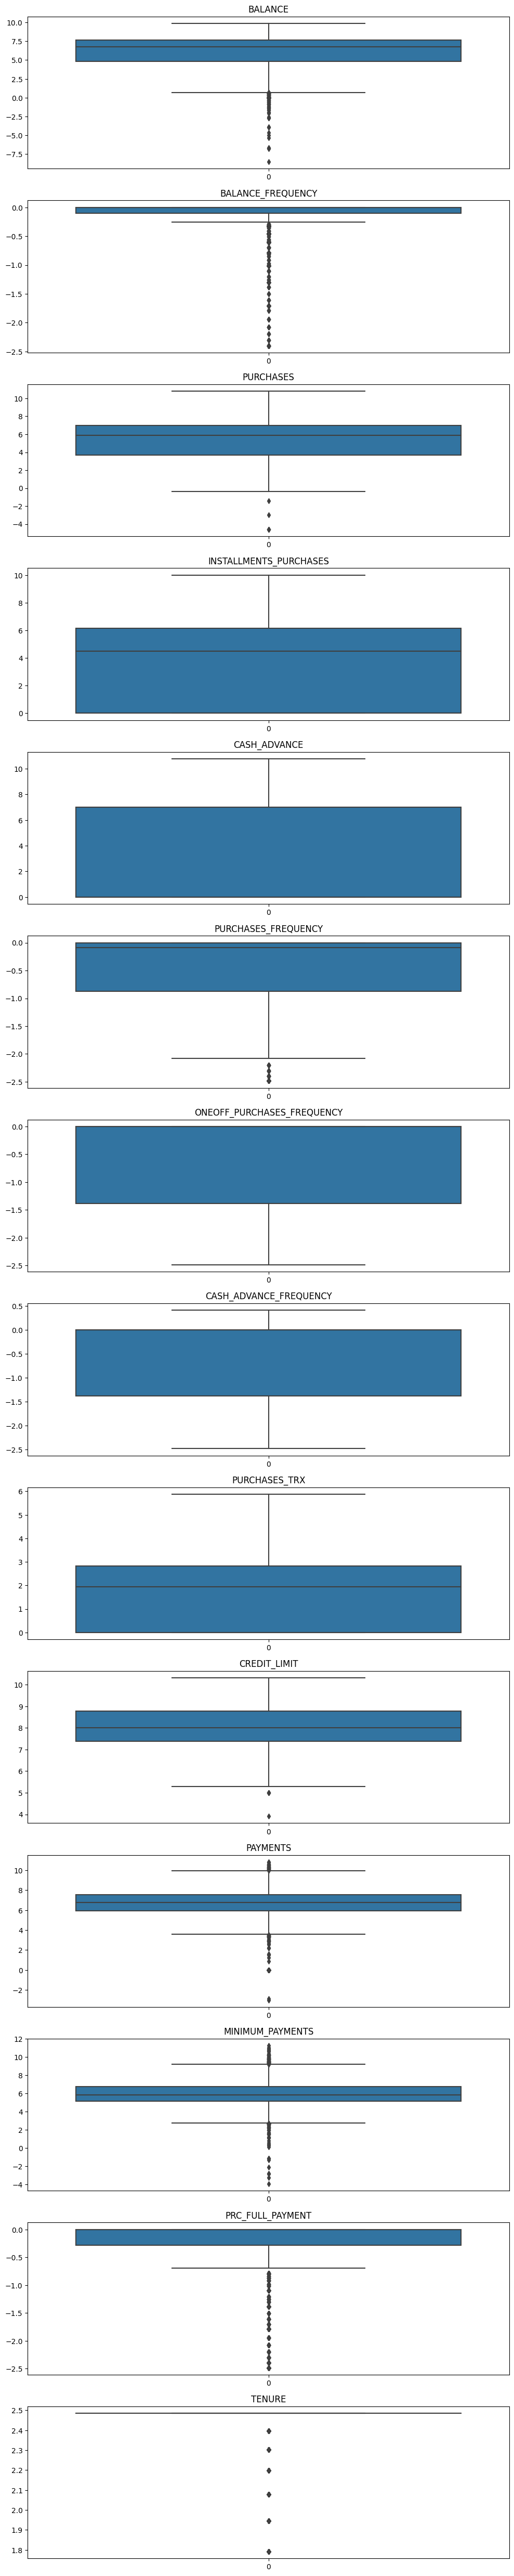

In [28]:
plt.figure(figsize=(10,60))
for i, col in enumerate(df_temp.columns):
    plt.subplot(17,1,i+1)
    sns.boxplot(df_temp[col])
    plt.title(col)
plt.tight_layout()

In [29]:
# A DataFrame representing Min, Max, Median, 25th percentile, 75th percentile, IQR, Lower fence, and Upper fence for each column
df_details = df_temp.describe().T
df_details['IQR'] = df_details['75%'] - df_details['25%']
df_details['Lower Fence'] = df_details['25%'] - 1.5 * df_details['IQR']
df_details['Upper Fence'] = df_details['75%'] + 1.5 * df_details['IQR']

In [30]:
lst_row_number = set()
outliner_col = dict()
for col in df_temp.columns:
    outliner_col[col] = 0


for i in range(len(df_temp)):
    for col in df_temp.columns:
        if (df_temp.loc[i, col] < df_details.loc[col, 'Lower Fence']) or (df_temp.loc[i, col] > df_details.loc[col, 'Upper Fence']):
            lst_row_number.add(i)
            outliner_col[col]+=1
            break
print(len(lst_row_number))
for i in outliner_col:
    print(i, outliner_col[i])


4457
BALANCE 172
BALANCE_FREQUENCY 1566
PURCHASES 3
INSTALLMENTS_PURCHASES 0
CASH_ADVANCE 0
PURCHASES_FREQUENCY 475
ONEOFF_PURCHASES_FREQUENCY 0
CASH_ADVANCE_FREQUENCY 0
PURCHASES_TRX 0
CREDIT_LIMIT 5
PAYMENTS 111
MINIMUM_PAYMENTS 74
PRC_FULL_PAYMENT 1297
TENURE 754


In [31]:
df=df_temp

# Scaling the DataFrame

In [32]:
scaled_df = scalar.fit_transform(df)

# Dimensionality reduction
Converting the DataFrame into 2D DataFrame for visualization

In [33]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

PCA1      PCA2
0    -0.257431  0.190016
1     0.766772 -0.296761
2    -0.179065 -0.223595
3     0.522988  1.125803
4    -0.097253  1.173966
5    -0.484207 -0.285258
6    -0.627463 -0.440055
7    -0.438756 -0.371474
8    -0.505523  0.648191
9    -0.224107  0.801717
10   -0.483214 -0.389010
11   -0.234504  0.550282
12   -0.642798 -0.059246
13   -0.721103  0.065312
14    0.833073 -0.251879
15    0.190728 -0.326134
16    0.779131 -0.235267
17   -0.471481 -0.143155
18   -0.548004  0.435693
19   -0.424000 -0.375590
20   -0.348439 -0.235155
21   -0.147932 -0.478775
22   -0.515071 -0.375795
23    0.007352  0.223933
24    0.630419 -0.229183
25   -0.445646 -0.361906
26    0.391126  0.715746
27   -0.409370 -0.346654
28   -0.036522  0.203226
29   -0.318446 -0.081285
30   -0.198866 -0.039287
31   -0.135848  0.190679
32    0.458848  1.044183
33   -0.204660 -0.202298
34   -0.456649 -0.383662
35    0.767501 -0.238671
36    0.635217 -0.230977
37   -0.031998 -0.234583
38    0.418904  1.068058
39    0.333494  1.024231
40    0.719237 -0.284158
41    0.009162 -0.176189
42   -0.138846  1.171315
43    0.904287 -0.255365
44   -0.587905 -0.106572
45    0.074387  0.580573
46    0.468099 -0.109922
47    0.618668 -0.200949
48   -0.663492 -0.342117
49    0.530461  0.596555
50    0.054265 -0.035328
51   -0.563761 -0.147814
52    0.635743 -0.224679
53    0.540425 -0.152408
54   -0.412998 -0.218524
55   -0.222555  0.558249
56    0.319765  0.505174
57   -0.608450 -0.449489
58    0.684929 -0.233386
59    0.187394 -0.194382
60   -0.137538  0.790100
61   -0.119444  1.176577
62    0.589513 -0.300406
63   -0.184094  1.311642
64    0.140595 -0.647497
65   -0.418306  0.113859
66    0.837927 -0.237090
67    0.556477 -0.212088
68   -0.495386  0.393389
69   -0.183814  0.396570
70    0.093886 -0.420539
71   -0.125683 -0.257670
72    0.833296 -0.298915
73   -0.500073  0.477198
74   -0.532213  0.657912
75   -0.527028  0.172210
76   -0.198945 -0.240790
77   -0.402529 -0.278486
78    0.726657 -0.224778
79    0.427667 -0.002390
80   -0.545460  0.206241
81    0.805003 -0.183989
82   -0.442021  0.415480
83   -0.452319 -0.162039
84    0.147949 -0.514625
85   -0.242654 -0.241036
86    0.029027 -0.389679
87   -0.123441 -0.432954
88    0.556063  1.080456
89    0.664753 -0.234096
90    0.002929 -0.186114
91   -0.127401  0.148498
92    0.631513  1.077851
93   -0.154587  0.808593
94   -0.141089  0.578178
95    0.781502 -0.236857
96   -0.198100 -0.002786
97    0.610915 -0.199731
98   -0.281189  0.113089
99    0.681177 -0.218887
100  -0.085126  1.054781
101  -0.533007 -0.333001
102  -0.677363 -0.498268
103  -0.514532 -0.265232
104   0.832643 -0.337959
105   0.352633  0.479156
106  -0.538121 -0.466170
107   0.639421 -0.229902
108   0.240002  0.157578
109  -0.139441 -0.594937
110  -0.622796 -0.075901
111   0.892374 -0.237593
112  -0.134177 -0.161662
113   0.763811 -0.246936
114  -0.511480 -0.005798
115  -0.528516 -0.236236
116  -0.581831 -0.289580
117   0.671642 -0.228253
118  -0.367487  0.187343
119   0.612616 -0.222628
120  -0.189697 -0.524548
121  -0.238755  0.547739
122  -0.716558 -0.496871
123   0.768574 -0.244239
124   0.731016 -0.248901
125  -0.409409 -0.273101
126   0.734284 -0.277507
127  -0.618214  0.143081
128   0.451644  1.087135
129   0.928553 -0.138395
130   0.475683  0.514023
131  -0.621045  0.006436
132  -0.393386 -0.178290
133   0.353350  1.011594
134  -0.488633 -0.366125
135  -0.487783  0.343616
136  -0.716693 -0.280674
137   0.065455 -0.102726
138  -0.844093 -0.481089
139   0.591355 -0.323200
140  -0.349863  0.377180
141   0.769392 -0.237074
142   0.654754 -0.207180
143  -0.543142 -0.052415
144  -0.693593 -0.483698
145  -0.216453  1.152880
146  -0.479188 -0.323704
147   0.574370  0.995646
148  -0.537961  0.189315
149   0.001946  0.184263
150   0.049450 -0.387359
151  -0.569462 -0.416666
152  -0.545581 -0.406863
153  -0.347476 -0.518118
154  -0.674915 -0.244891
155  -0.511979 -0.100066
156  -0.057417 -0.437161
157   0.631161 -0.221398
158  -0.703416 -0.524032
159   0.46

# Hyperparameter tuning
## Finding 'k' value by Elbow Method

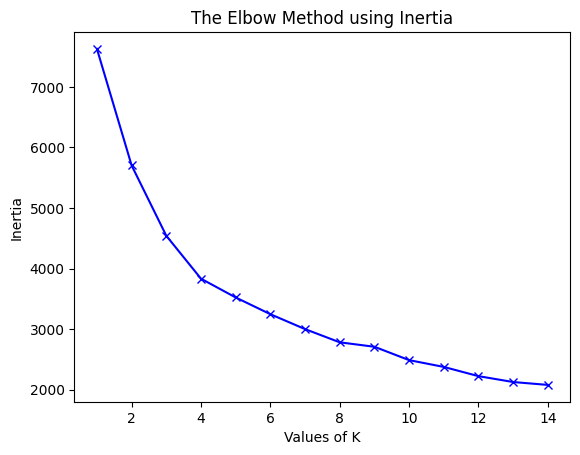

In [34]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

# Model Building using KMeans

In [52]:

kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

# Visualizing the clustered dataframe

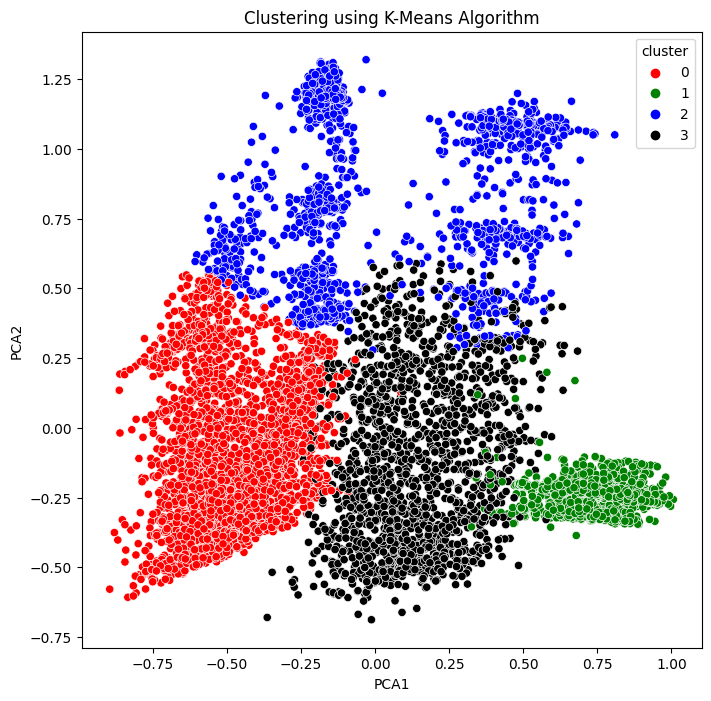

In [53]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [54]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES INSTALLMENTS_PURCHASES CASH_ADVANCE  \
0  0.750034          0.934441  0.727544               0.543356     0.000158   
1  0.842222          0.923812  0.306020               0.000965     0.636059   
2  0.776814          0.838379  0.640297               0.074838     0.250876   
3  0.867429          0.982077  0.736927               0.518980     0.643159   

  PURCHASES_FREQUENCY ONEOFF_PURCHASES_FREQUENCY CASH_ADVANCE_FREQUENCY  \
0            0.870855                   0.809608               0.859719   
1            0.997950                   0.999390               0.321719   
2            0.201178                   0.201653               0.660969   
3            0.833902                   0.672242               0.331669   

  PURCHASES_TRX CREDIT_LIMIT  PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT  \
0      0.461421     0.653021  0.693029         0.625329         0.817302   
1      0.007155     0.637309  0.689257         0.670122         0.859238   
2      0.122181     0.644230  0.656891         0.643032         0.902808   
3      0.467931     0.685251  0.744820         0.693812         0.814434   

     TENURE  
0  0.947390  
1  0.896320  
2  0.925983  
3  0.924522

In [ ]:
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

In [ ]:
cluster_centers = np.expm1(cluster_centers)
cluster_centers

In [59]:
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])

In [60]:
cluster_centers

BALANCE BALANCE_FREQUENCY   PURCHASES INSTALLMENTS_PURCHASES  \
0   191.658084         -0.145470  736.341799             230.625175   
1  1047.405079         -0.166974    0.115427               0.009717   
2   314.150471         -0.321283  191.281010               1.116947   
3  1665.108196         -0.042066  851.003888             180.425087   

  CASH_ADVANCE PURCHASES_FREQUENCY ONEOFF_PURCHASES_FREQUENCY  \
0     0.001696           -0.274514                  -0.376937   
1   937.717603           -0.005081                  -0.001514   
2    13.874186           -0.862620                  -0.862457   
3  1012.249085           -0.338165                  -0.557117   

  CASH_ADVANCE_FREQUENCY PURCHASES_TRX CREDIT_LIMIT     PAYMENTS  \
0          -1.668660e-14     14.080440  3258.575466   723.689125   
1          -7.888153e-01      0.042972  2946.889244   686.832365   
2          -4.369916e-01      1.051329  3080.321655   438.487834   
3          -7.826536e-01     14.668996  4004.912841  1483.014662   

  MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0       256.070919        -0.364910  10.570281  
1       506.826117        -0.295158  10.167875  
2       335.436731        -0.214561  10.399870  
3       726.925711        -0.369420  10.388334

In [38]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df1,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000      12        1  
1  4103.032597       1072.340217          0.222222      12        2  
2   622.066742        627.284787          0.000000      12        1  
3     0.000000               NaN          0.000000      12        3  
4   678.334763        244.791237          0.000000      12        3

In [61]:
cluster_df.to_csv("Clustered_customer_data.csv")

In [39]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df.head()

CUST_ID       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
15  C10016   6886.213231           1.000000    1611.70              0.00   
21  C10022   6369.531318           1.000000    6359.95           5910.04   
23  C10024   3800.151377           0.818182    4248.35           3454.56   
28  C10029   7152.864372           1.000000     387.05            204.55   
30  C10031  12136.219960           1.000000    3038.01           1013.20   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
15                 1611.70   2301.491267             0.500000   
21                  449.91    229.028245             1.000000   
23                  793.79   7974.415626             1.000000   
28                  182.50   2236.145259             0.666667   
30                 2024.81   3183.583301             1.000000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
15                    0.000000                          0.500000   
21                    0.916667                          1.000000   
23                    0.083333                          0.916667   
28                    0.166667                          0.416667   
30                    0.166667                          1.000000   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
15                0.166667                 4             11        8000.0   
21                0.333333                 6             92       11250.0   
23                0.333333                13             13        9000.0   
28                0.833333                16              8       10500.0   
30                0.500000                10             64       13000.0   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
15  1993.439277       2109.906490               0.0      12        0  
21  2077.959051       1659.775075               0.0      12        0  
23  9479.043842       1425.426525               0.0      12        0  
28  1601.448347       1648.851345               0.0      12        0  
30  4230.323491       3292.015030               0.0      12        0

In [40]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40           0.0             0.166667   
2                    0.00           0.0             1.000000   
5                 1333.28           0.0             0.666667   
6                  688.38           0.0             1.000000   
7                  436.20           0.0             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   
2                         1.0                          0.000000   
5                         0.0                          0.583333   
6                         1.0                          1.000000   
7                         0.0                          1.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1000.0   
2                     0.0                 0             12        7500.0   
5                     0.0                 0              8        1800.0   
6                     0.0                 0             64       13500.0   
7                     0.0                 0             12        2300.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787               0.0      12        1  
2   622.066742        627.284787               0.0      12        1  
5  1400.057770       2407.246035               0.0      12        1  
6  6354.314328        198.065894               1.0      12        1  
7   679.065082        532.033990               0.0      12        1

In [41]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_3_df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1   C10002  3202.467416           0.909091        0.0               0.0   
14  C10015  2772.772734           1.000000        0.0               0.0   
16  C10017  2072.074354           0.875000        0.0               0.0   
24  C10025  5368.571219           1.000000        0.0               0.0   
35  C10036  1656.350781           1.000000        0.0               0.0   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                      0.0   6442.945483                  0.0   
14                     0.0    346.811390                  0.0   
16                     0.0   2784.274703                  0.0   
24                     0.0    798.949863                  0.0   
35                     0.0     99.264367                  0.0   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                          0.0                               0.0   
14                         0.0                               0.0   
16                         0.0                               0.0   
24                         0.0                               0.0   
35                         0.0                               0.0   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                 0.250000                 4              0        7000.0   
14                0.083333                 1              0        3000.0   
16                0.250000                 3              0        3000.0   
24                0.363636                 4              0        6000.0   
35                0.083333                 1              0        1800.0   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
1   4103.032597       1072.340217          0.222222      12        2  
14   805.647974        989.962866          0.000000      12        2  
16   391.974562        376.579631          0.000000       8        2  
24  1422.726707       1657.002877          0.000000      11        2  
35   351.500199        634.569311          0.000000      12        2

In [42]:
cluster_4_df = cluster_df[cluster_df["Cluster"] == 3]
cluster_4_df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3   C10004  1666.670542           0.636364    1499.00           1499.00   
4   C10005   817.714335           1.000000      16.00             16.00   
8   C10009  1014.926473           1.000000     861.49            661.49   
9   C10010   152.225975           0.545455    1281.60           1281.60   
11  C10012   630.794744           0.818182    1492.18           1492.18   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                      0.0    205.788017             0.083333   
4                      0.0      0.000000             0.083333   
8                    200.0      0.000000             0.333333   
9                      0.0      0.000000             0.166667   
11                     0.0      0.000000             0.250000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                     0.083333                              0.00   
4                     0.083333                              0.00   
8                     0.083333                              0.25   
9                     0.166667                              0.00   
11                    0.250000                              0.00   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                 0.083333                 1              1        7500.0   
4                 0.000000                 0              1        1200.0   
8                 0.000000                 0              5        7000.0   
9                 0.000000                 0              3       11000.0   
11                0.000000                 0              6        2000.0   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
3      0.000000               NaN               0.0      12        3  
4    678.334763        244.791237               0.0      12        3  
8    688.278568        311.963409               0.0      12        3  
9   1164.770591        100.302262               0.0      12        3  
11   705.618627        155.549069               0.0      12        3

<Axes: xlabel='Cluster', ylabel='count'>

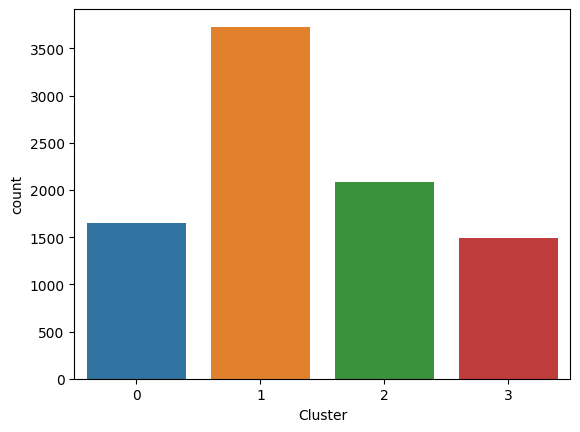

In [43]:
  #Visualization
  sns.countplot(x='Cluster', data=cluster_df)
